In [1]:
# importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, save_img
import os
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
train_data_path = '../data/eye_data/training/train'
val_data_path = '../data/eye_data/training/val'

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        shear_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_data_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        val_data_path,
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')

Found 159 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


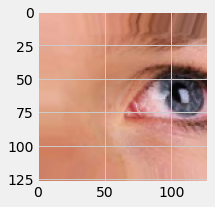

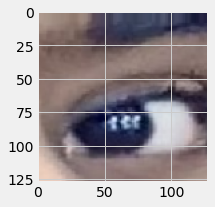

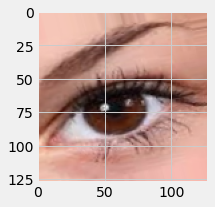

In [4]:
x_train, y_train = train_generator.__next__()


# checking/ verifying if the image and masks are coorelated
for i in range(0,3):
    image = x_train[i]
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.show()

In [5]:
K.clear_session()

#defining the CNN2D model
model = Sequential([

    Conv2D(filters= 6, kernel_size=(5,5), strides=(1,1), input_shape=x_train[0].shape,
           activation=keras.activations.relu,
           padding='valid', kernel_regularizer=l2(0.0001)), # valid means no padding

    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'),
    
    Conv2D(filters = 16, kernel_size=(5,5),strides=(1,1),
           activation=keras.activations.relu, 
           padding = 'valid',kernel_regularizer=l2(0.0001)), # valid means no padding
    
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding= 'valid'), # valid means no padding
    
    Flatten(),
    
    # Fully connected dense layer with relu activation function
    Dropout(0.2),
    Dense(units=256, activation=keras.activations.relu),
    BatchNormalization(),
    
    # Fully connected dense layer with relu activation function
    Dropout(0.2),
    Dense(units=128, activation=keras.activations.relu),
    BatchNormalization(),

    # Fully connected dense layer with relu activation function
    Dropout(0.2),
    Dense(units=64, activation=keras.activations.relu),
    BatchNormalization(),

    # Fully connected dense layer with relu activation function
    Dropout(0.2),
    Dense(units=32, activation=keras.activations.relu),
    BatchNormalization(),

    # Fully connected output layer with softmax
    Dense(units=2, activation=keras.activations.softmax)   # How many neurons? we want classify two classes
    
])

# compling the model
model.compile(optimizer=keras.optimizers.Adam(0.5e-4), 
                loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

cb = keras.callbacks.EarlyStopping(monitor="accuracy",
                                    min_delta=0.005,
                                    patience=30,
                                    verbose=1,
                                    mode="min",
                                    baseline=None,
                                    restore_best_weights=False)


In [6]:
model.fit(train_generator,
        batch_size = 10, 
        epochs = 150,
        verbose = 1, 
        validation_data = validation_generator)

Epoch 1/150
5/5 [==============================] - 7s 172ms/step - loss: 1.0294 - accuracy: 0.4717 - val_loss: 0.6971 - val_accuracy: 0.5517
Epoch 2/150
5/5 [==============================] - 1s 118ms/step - loss: 1.0322 - accuracy: 0.5786 - val_loss: 0.6965 - val_accuracy: 0.3793
Epoch 3/150
5/5 [==============================] - 1s 120ms/step - loss: 0.7802 - accuracy: 0.6038 - val_loss: 0.6946 - val_accuracy: 0.4828
Epoch 4/150
5/5 [==============================] - 1s 123ms/step - loss: 0.8064 - accuracy: 0.5472 - val_loss: 0.6967 - val_accuracy: 0.4828
Epoch 5/150
5/5 [==============================] - 1s 122ms/step - loss: 0.8012 - accuracy: 0.5912 - val_loss: 0.7001 - val_accuracy: 0.4828
Epoch 6/150
5/5 [==============================] - 1s 121ms/step - loss: 0.7613 - accuracy: 0.6415 - val_loss: 0.7013 - val_accuracy: 0.4828
Epoch 7/150
5/5 [==============================] - 1s 116ms/step - loss: 0.7692 - accuracy: 0.5912 - val_loss: 0.6996 - val_accuracy: 0.5172
Epoch 8/150
5